In [5]:
import pandas as pd 
import sqlite3
import os

In [12]:
TEST_DB = r"D:\Digital_Pathology_Edge\data\raw\test\MITOS_WSI_CCMCT_ODAEL_test.dcm.sqlite"
TRAIN_DB = r"D:\Digital_Pathology_Edge\data\raw\train\MITOS_WSI_CCMCT_ODAEL_train_dcm.sqlite"



In [17]:
def connect_to_db(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"DB not found: {path}")
    conn = sqlite3.connect(path)
    print("Connected to:", path)
    return conn




### Train 

In [23]:
conn = connect_to_db(TRAIN_DB)

Connected to: D:\Digital_Pathology_Edge\data\raw\train\MITOS_WSI_CCMCT_ODAEL_train_dcm.sqlite


In [24]:
tables = pd.read_sql_query(
    "SELECT name FROM sqlite_master WHERE type='table';", conn
)
tables


,name
0,Slides
1,sqlite_sequence
2,Classes
3,Persons
4,Annotations
5,Annotations_coordinates
6,Annotations_label
7,Log


In [25]:
for t in tables['name']:
    print("\n\n==== TABLE:", t, "====")
    schema = pd.read_sql_query(f"PRAGMA table_info({t});", conn)
    display(schema)





==== TABLE: Slides ====


,cid,name,type,notnull,dflt_value,pk
0,0,uid,INTEGER,0,None,1
1,1,filename,TEXT,0,None,0
2,2,width,INTEGER,0,None,0
3,3,height,INTEGER,0,None,0
4,4,directory,TEXT,0,None,0
5,5,uuid,TEXT,0,None,0




==== TABLE: sqlite_sequence ====


,cid,name,type,notnull,dflt_value,pk
0,0,name,,0,None,0
1,1,seq,,0,None,0




==== TABLE: Classes ====


,cid,name,type,notnull,dflt_value,pk
0,0,uid,INTEGER,0,None,1
1,1,name,TEXT,0,None,0




==== TABLE: Persons ====


,cid,name,type,notnull,dflt_value,pk
0,0,uid,INTEGER,0,None,1
1,1,name,TEXT,0,None,0




==== TABLE: Annotations ====


,cid,name,type,notnull,dflt_value,pk
0,0,uid,INTEGER,0,None,1
1,1,agreedClass,INTEGER,0,None,0
2,2,type,INTEGER,0,None,0
3,3,slide,INTEGER,0,None,0
4,4,guid,TEXT,0,None,0
5,5,deleted,INTEGER,0,0,0
6,6,lastModified,REAL,0,1579599065.1893585,0




==== TABLE: Annotations_coordinates ====


,cid,name,type,notnull,dflt_value,pk
0,0,uid,INTEGER,0,None,1
1,1,coordinateX,INTEGER,0,None,0
2,2,coordinateY,INTEGER,0,None,0
3,3,slide,INTEGER,0,None,0
4,4,annoId,INTEGER,0,None,0
5,5,orderIdx,INTEGER,0,None,0




==== TABLE: Annotations_label ====


,cid,name,type,notnull,dflt_value,pk
0,0,uid,INTEGER,0,None,1
1,1,person,INTEGER,0,None,0
2,2,class,INTEGER,0,None,0
3,3,annoId,INTEGER,0,None,0




==== TABLE: Log ====


,cid,name,type,notnull,dflt_value,pk
0,0,uid,INTEGER,0,None,1
1,1,dateTime,FLOAT,0,None,0
2,2,labelId,INTEGER,0,None,0


In [26]:
for t in tables['name']:
    count = pd.read_sql_query(f"SELECT COUNT(*) AS n FROM {t};", conn)
    print(f"{t}: {count['n'][0]} rows")


Slides: 21 rows
sqlite_sequence: 7 rows
Classes: 7 rows
Persons: 5 rows
Annotations: 158912 rows
Annotations_coordinates: 158929 rows
Annotations_label: 358255 rows
Log: 0 rows


In [27]:
classes_df = pd.read_sql_query("SELECT * FROM classes;", conn)
classes_df


,uid,name
0,1,granulocyte
1,2,mitotic figure
2,3,tumor cell
3,4,other/ambigous cells
4,5,binucleated cell
5,6,multinukleated cell
6,7,Mitotic figure lookalike


In [28]:
annotations_df = pd.read_sql_query(
    "SELECT * FROM annotations LIMIT 20;", conn
)
annotations_df


,uid,agreedClass,type,slide,guid,deleted,lastModified
0,41346,1,1,4,b1a93cbb-4fdf-480e-b90e-a0afe23a45bd,0,1.579599e+09
1,41347,1,1,4,a5611dcf-b35a-4dcd-9825-23f96618cd46,0,1.579599e+09
2,41348,1,1,4,4d67957b-8c1c-42f0-bca0-15f5a8021a06,0,1.579599e+09
3,41349,4,1,4,652adea5-9f1b-40ee-a047-df0d4a42516c,0,1.579599e+09
4,41350,1,1,4,01e7a5b6-d714-4fcc-bd8d-78e967ed923c,0,1.579599e+09
5,41351,1,1,4,21eb83d9-bd5c-4379-9041-fbba8bb3bc5d,0,1.579599e+09
6,41352,1,1,4,30447768-30cf-4dd0-b522-7f483ac239a3,0,1.579599e+09
7,41353,1,1,4,e32c8498-b669-448b-bb04-8e5e28406010,0,1.579599e+09
8,41354,4,1,4,f3b875b0-57da-4c69-944d-dd3089ece0bd,0,1.579599e+09
9,41355,1,1,4,06e23493-97d0-4136-852e-8fbc1ff56a85,0,1.579599e+09


In [41]:
slides_df = pd.read_sql_query("SELECT * FROM Slides;", conn)
classes_df = pd.read_sql_query("SELECT * FROM Classes;", conn)
persons_df = pd.read_sql_query("SELECT * FROM Persons;", conn)
annotations_df = pd.read_sql_query("SELECT * FROM Annotations;", conn)
coords_df = pd.read_sql_query("SELECT * FROM Annotations_coordinates;", conn)
labels_df = pd.read_sql_query("SELECT * FROM Annotations_label;", conn)
logs_df = pd.read_sql_query("SELECT * FROM Log;", conn)



In [42]:
print("Slides:", slides_df.shape)
print("Annotations:", annotations_df.shape)
print("Coordinates:", coords_df.shape)
print("Labels:", labels_df.shape)
print("Classes:", classes_df)
print("Persons:", persons_df)


Slides: (21, 6)
Annotations: (158912, 7)
Coordinates: (158929, 6)
Labels: (358255, 4)
Classes:    uid                      name
0    1               granulocyte
1    2            mitotic figure
2    3                tumor cell
3    4      other/ambigous cells
4    5          binucleated cell
5    6       multinukleated cell
6    7  Mitotic figure lookalike
Persons:    uid                                               name
0    1                                 Robert Klopfleisch
1    2                                   Christof Bertram
2    3            Robert Klopfleisch and Christof Bertram
3    4                                          RetinaNet
4    5  Robert Klopfleisch and Christof Bertram after HEM


In [43]:
ann_class_count = annotations_df['agreedClass'].value_counts().rename_axis("class").reset_index(name='count')
ann_class_count



,class,count
0,3,45179
1,4,41658
2,1,35331
3,2,22404
4,7,14340


In [44]:
joined = annotations_df.merge(labels_df, left_on="uid", right_on="annoId", how="left")
joined = joined.merge(classes_df, left_on="class", right_on="uid", how="left", suffixes=("", "_class"))
joined[['uid','agreedClass','type','slide','class','name']]


,uid,agreedClass,type,slide,class,name
0,1.0,1,1,4,1,granulocyte
1,4.0,1,1,4,4,other/ambigous cells
2,1.0,1,1,4,1,granulocyte
3,1.0,1,1,4,1,granulocyte
4,4.0,1,1,4,4,other/ambigous cells
...,...,...,...,...,...,...
358137,7.0,7,1,36,7,Mitotic figure lookalike
358138,2.0,7,1,36,2,mitotic figure
358139,7.0,7,1,36,7,Mitotic figure lookalike
358140,7.0,7,1,36,7,Mitotic figure lookalike


In [66]:
import pandas as pd

orderidx_unique = coords_df['orderIdx'].unique()
print("Unique orderIdx values:", orderidx_unique)


Unique orderIdx values: [nan  1.]


In [ ]:
coord_counts = coords_df.groupby("annoId").size().reset_index(name="n_points")
coord_counts


,annoId,n_points
0,41346,1
1,41347,1
2,41348,1
3,41349,1
4,41350,1
...,...,...
158924,387643,1
158925,387644,1
158926,387647,1
158927,387648,1


In [68]:
polygons = coord_counts[coord_counts['n_points'] > 1]
polygons


,annoId,n_points


In [69]:
coords_df.groupby("annoId")['orderIdx'].nunique().value_counts()


orderIdx
1    132286
0     26643
Name: count, dtype: int64

In [70]:
coord_counts = coords_df.groupby("annoId")['orderIdx'].nunique().reset_index()
coord_counts.rename(columns={'orderIdx':'n_orderIdx'}, inplace=True)

# Check annotations with more than 1 orderIdx
multi_point_annotations = coord_counts[coord_counts['n_orderIdx'] > 1]
print(multi_point_annotations)


Empty DataFrame
Columns: [annoId, n_orderIdx]
Index: []


In [74]:
print(coords_df.dtypes)
print(coords_df['orderIdx'].unique())


uid              int64
coordinateX      int64
coordinateY      int64
slide            int64
annoId           int64
orderIdx       float64
dtype: object
[nan  1.]


In [73]:
missing = coords_df[
    ~coords_df['annoId'].isin(annotations_df['uid'])
]
print("Rows in coordinates without matching annotation:", len(missing))
missing


Rows in coordinates without matching annotation: 17


,uid,coordinateX,coordinateY,slide,annoId,orderIdx
41346,125481,21877,10781,4,125481,1.0
41472,125628,16032,13846,4,125628,1.0
41708,125906,10383,21652,4,125906,1.0
42309,126575,3675,35476,4,126575,1.0
51067,141710,22861,62707,8,141710,1.0
52138,145243,40708,58853,3,145243,1.0
54248,149966,17137,48558,14,149966,1.0
55244,151163,11200,39038,23,151163,1.0
55309,151321,5164,26434,27,151321,1.0
55310,151340,8485,63576,27,151340,1.0


In [76]:
coords = pd.read_sql_query(
    f"SELECT * FROM Annotations_coordinates WHERE annoId={360365};",
    conn
)
coords


,uid,coordinateX,coordinateY,slide,annoId,orderIdx
0,456997,53904,19452,23,360365,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_annotation_polygon(anno_id, conn):
    coords = pd.read_sql_query(
        f"SELECT * FROM Annotations_coordinates WHERE annoId={anno_id};",
        conn
    )
    
    if coords.empty:
        print(f"No coordinates for annotation {anno_id}")
        return
    
    # Sort by orderIdx if it exists, otherwise by uid
    if "orderIdx" in coords.columns and coords["orderIdx"].notna().all():
        coords = coords.sort_values("orderIdx")
    else:
        coords = coords.sort_values("uid") 

    x = coords["coordinateX"].values
    y = coords["coordinateY"].values

    plt.figure(figsize=(5,5))
    plt.plot(x, y, marker="o")  
    plt.scatter(x, y, s=20, color="red")
    
    plt.title(f"Annotation {anno_id} — {len(coords)} points")
    plt.gca().invert_yaxis()  
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()



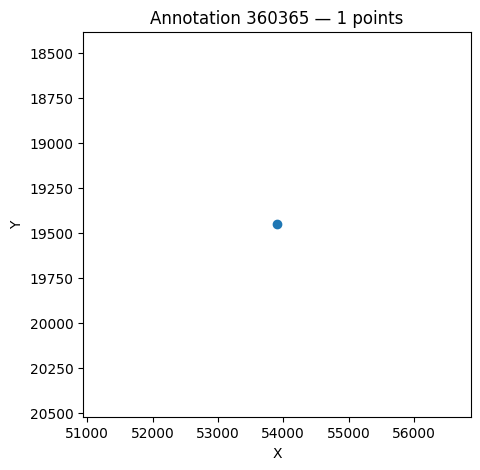

In [78]:
plot_annotation_polygon(360365, conn)

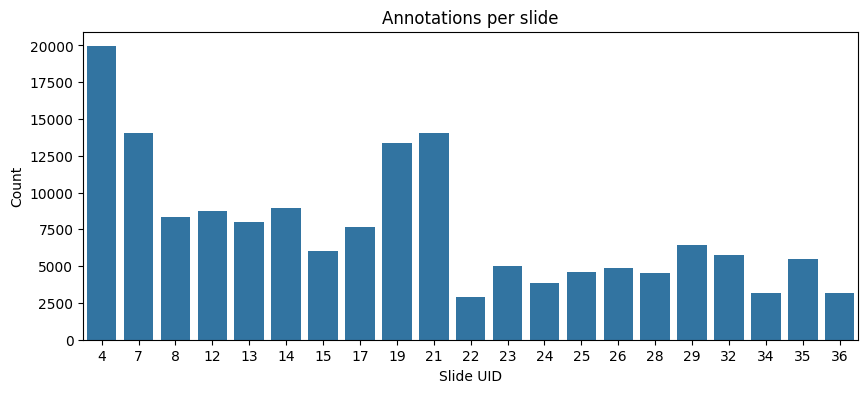

In [50]:
slide_counts = annotations_df['slide'].value_counts().sort_index()

plt.figure(figsize=(10,4))
sns.barplot(x=slide_counts.index, y=slide_counts.values)
plt.title("Annotations per slide")
plt.xlabel("Slide UID")
plt.ylabel("Count")
plt.show()


In [79]:
conn.close()


### Test

In [19]:
conn = connect_to_db(TEST_DB)

Connected to: D:\Digital_Pathology_Edge\data\raw\test\MITOS_WSI_CCMCT_ODAEL_test.dcm.sqlite


In [20]:
tables = pd.read_sql_query(
    "SELECT name FROM sqlite_master WHERE type='table';", conn
)
tables


,name
0,Slides
1,sqlite_sequence
2,Classes
3,Persons
4,Annotations
5,Annotations_coordinates
6,Annotations_label
7,Log


In [21]:
for t in tables['name']:
    print("\n\n==== TABLE:", t, "====")
    schema = pd.read_sql_query(f"PRAGMA table_info({t});", conn)
    display(schema)




==== TABLE: Slides ====


,cid,name,type,notnull,dflt_value,pk
0,0,uid,INTEGER,0,None,1
1,1,filename,TEXT,0,None,0
2,2,width,INTEGER,0,None,0
3,3,height,INTEGER,0,None,0
4,4,directory,TEXT,0,None,0
5,5,uuid,TEXT,0,None,0




==== TABLE: sqlite_sequence ====


,cid,name,type,notnull,dflt_value,pk
0,0,name,,0,None,0
1,1,seq,,0,None,0




==== TABLE: Classes ====


,cid,name,type,notnull,dflt_value,pk
0,0,uid,INTEGER,0,None,1
1,1,name,TEXT,0,None,0




==== TABLE: Persons ====


,cid,name,type,notnull,dflt_value,pk
0,0,uid,INTEGER,0,None,1
1,1,name,TEXT,0,None,0




==== TABLE: Annotations ====


,cid,name,type,notnull,dflt_value,pk
0,0,uid,INTEGER,0,None,1
1,1,agreedClass,INTEGER,0,None,0
2,2,type,INTEGER,0,None,0
3,3,slide,INTEGER,0,None,0
4,4,guid,TEXT,0,None,0
5,5,deleted,INTEGER,0,0,0
6,6,lastModified,REAL,0,1579599065.1893585,0




==== TABLE: Annotations_coordinates ====


,cid,name,type,notnull,dflt_value,pk
0,0,uid,INTEGER,0,None,1
1,1,coordinateX,INTEGER,0,None,0
2,2,coordinateY,INTEGER,0,None,0
3,3,slide,INTEGER,0,None,0
4,4,annoId,INTEGER,0,None,0
5,5,orderIdx,INTEGER,0,None,0




==== TABLE: Annotations_label ====


,cid,name,type,notnull,dflt_value,pk
0,0,uid,INTEGER,0,None,1
1,1,person,INTEGER,0,None,0
2,2,class,INTEGER,0,None,0
3,3,annoId,INTEGER,0,None,0




==== TABLE: Log ====


,cid,name,type,notnull,dflt_value,pk
0,0,uid,INTEGER,0,None,1
1,1,dateTime,FLOAT,0,None,0
2,2,labelId,INTEGER,0,None,0


In [22]:
for t in tables['name']:
    count = pd.read_sql_query(f"SELECT COUNT(*) AS n FROM {t};", conn)
    print(f"{t}: {count['n'][0]} rows")

Slides: 11 rows
sqlite_sequence: 7 rows
Classes: 7 rows
Persons: 5 rows
Annotations: 103569 rows
Annotations_coordinates: 103586 rows
Annotations_label: 243167 rows
Log: 0 rows
